In [23]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [24]:
movies = pd.read_csv("C:/Users/Narsing/Downloads/Assigments data science/9th--Assignment-AssociationRules/my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [25]:
#As the data is not in transaction formation We are using transaction Encoder

In [26]:
df = pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm

In [27]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

C:\Users\Narsing\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(Patriot, V1_Gladiator)"


In [28]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
8,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
9,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000


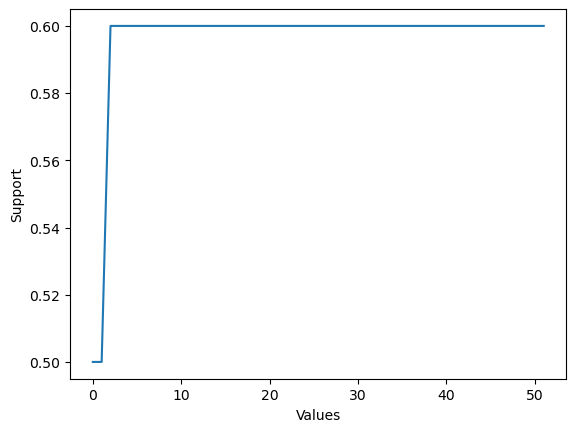

In [40]:
rules1 = association_rules(frequent_itemsets, metric='support', min_threshold=0.2)
rules1
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(rules1.support);
plt.xlabel('Values');
plt.ylabel('Support');

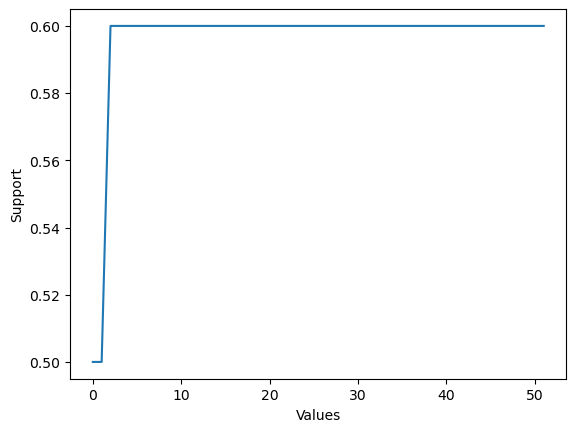

In [41]:
rules2 = association_rules(frequent_itemsets, metric='support', min_threshold=0.4)
rules2
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(rules2.support);
plt.xlabel('Values');
plt.ylabel('Support');

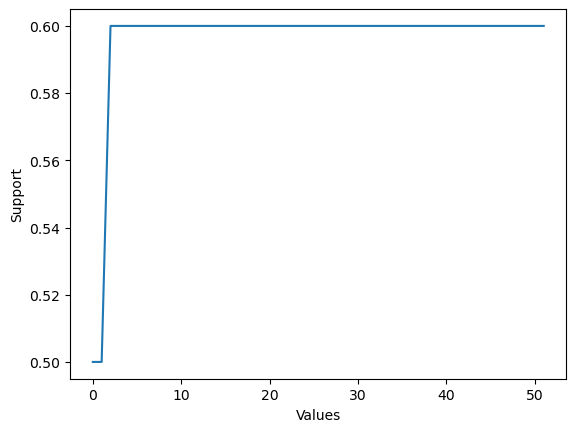

In [42]:
rules3 = association_rules(frequent_itemsets, metric='support', min_threshold=0.5)
rules3
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(rules3.support);
plt.xlabel('Values');
plt.ylabel('Support');

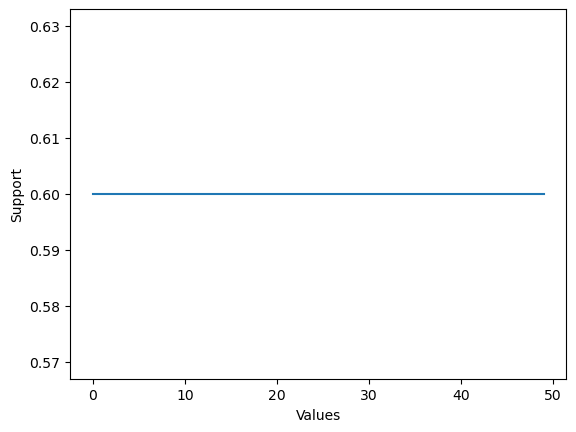

In [43]:
rules4 = association_rules(frequent_itemsets, metric='support', min_threshold=0.6)
rules4
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(rules4.support);
plt.xlabel('Values');
plt.ylabel('Support');

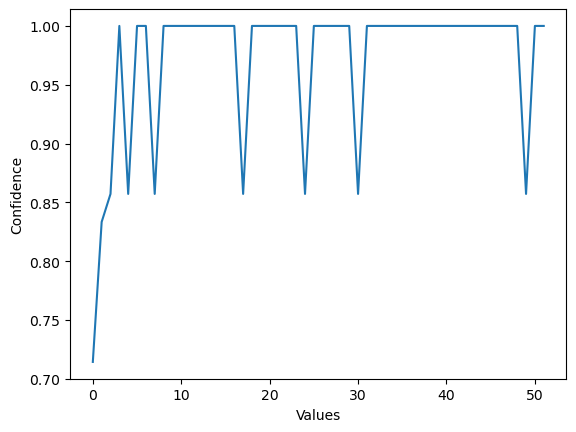

In [47]:
rules6 = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules6
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(rules4.confidence);
plt.xlabel('Values');
plt.ylabel('Confidence');

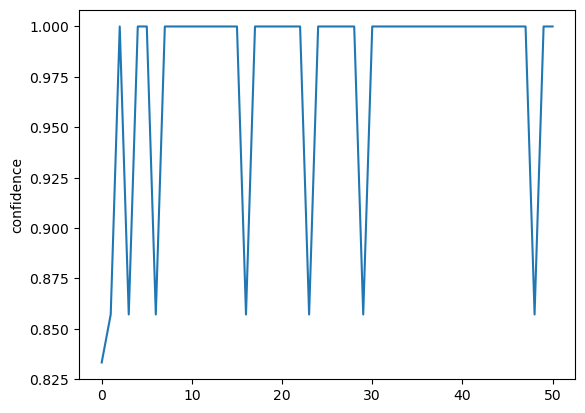

In [49]:
rules5 = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.8)
rules5
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(rules5.confidence);
plt.xlabel('');
plt.ylabel('confidence');

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5e0bf3610>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5e0bf08e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5e0bf1450>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5e0bf3730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5e0bf33a0>],
 'means': []}

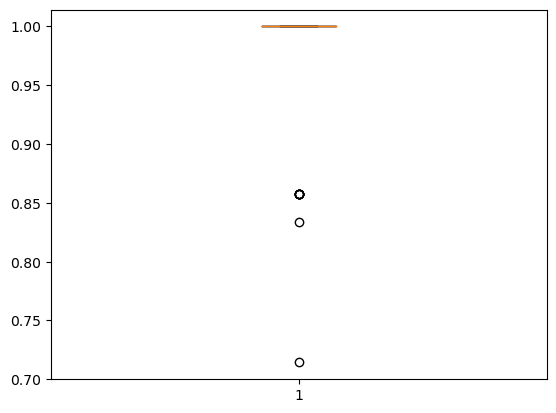

In [53]:
plt.boxplot(rules6['confidence'],vert = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5e0bcbcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5e0bdee00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5e0bc8310>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5e0bdd690>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5e0bde860>],
 'means': []}

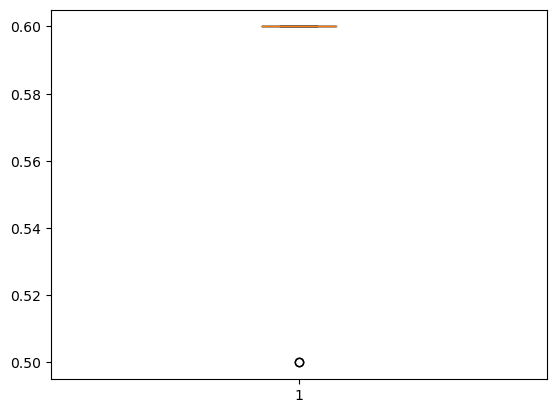

In [54]:
plt.boxplot(rules3['support'],vert = True)

<Axes: >

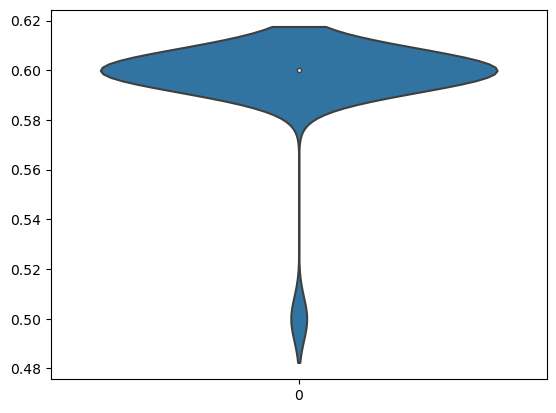

In [57]:
import seaborn as sns
sns.violinplot(rules3["support"])

<Axes: >

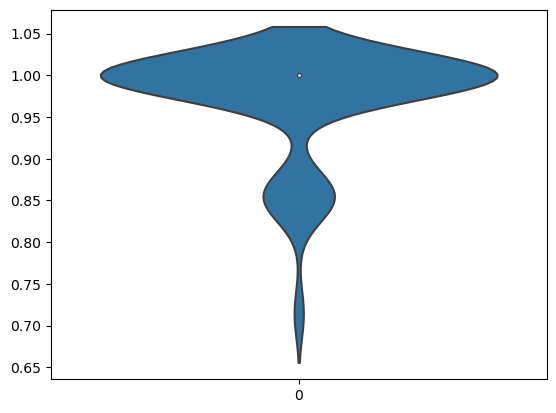

In [58]:
import seaborn as sns
sns.violinplot(rules3["confidence"])

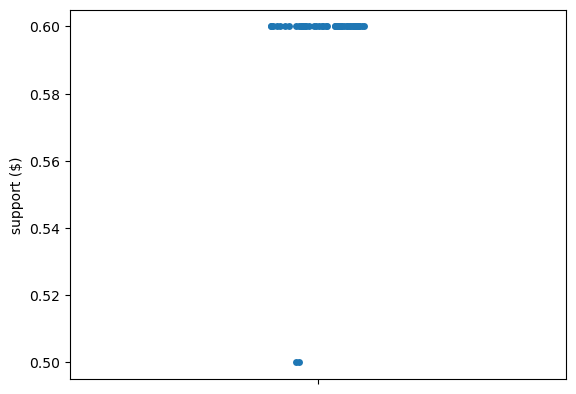

In [61]:
sns.stripplot(y= 'support', data=rules3,jitter=True)
plt.ylabel('support ($)')
plt.show()

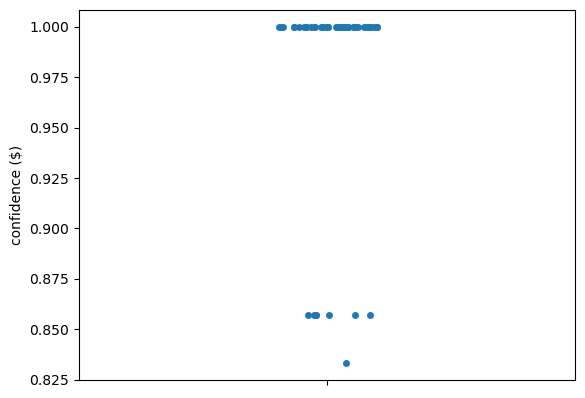

In [62]:
sns.stripplot(y= 'confidence', data=rules5,jitter=True)
plt.ylabel('confidence ($)')
plt.show()